In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [2]:
#Carga de datos
data_array = np.load ('data_proyecto/proyecto_data/proyecto_training_data.npy') 
data = pd.DataFrame (data_array,columns=["SalePrice","OverallQual","stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
data.head(3)
#data_array

,SalePrice,OverallQual,stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0


1460
1460


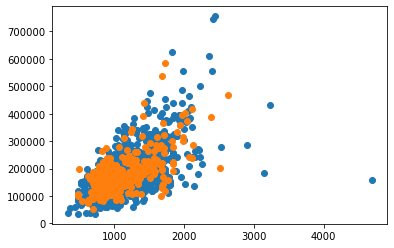

In [3]:
#Dividir dataset en Train and Test
#X_train, X_test, y_train, y_test =train_test_split(data_array[:,2],data_array[:,0],test_size = 0.20)
X_train, X_test, y_train, y_test =train_test_split(data_array[:,2],data_array[:,0],test_size = 0.20)
print(len(X_train)+len(X_test))
print(len(data.SalePrice))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.show()

In [4]:
# Estandarizacion de las columnas numéricas, comprobacion de tipo de datos
print(X_train.dtype)
print(y_train.dtype)


float64
float64


In [5]:
#print((X_train))
X_train=np.reshape(X_train,(-1,1))/1000 # Vector 
y_train=np.reshape(y_train,(-1,1))/1000 #Vector dividido entre 1000 ya que las variables se desvordan por ser valores muy grandes

y_train.shape
print(X_train)
print(y_train)

[[0.736]
 [1.08 ]
 [0.616]
 ...
 [0.784]
 [1.072]
 [2.073]]
[[113. ]
 [141. ]
 [115. ]
 ...
 [109.5]
 [148. ]
 [210. ]]


### Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x.

In [6]:
def f_coste(x, y, b1, b0):
    m = len(x)
    #betas=np.array([[b1],[b0]])
    #vector1=np.ones_like(x)
    #A=np.hstack([x,np.ones_like(x)])
    hipotesis=np.matmul(np.hstack([x,np.ones_like(x)]),np.array([[b1],[b0]]))  # Vector de hipostesis b0+b1*x[i]
    err=(y-hipotesis)**2  # Vector de errores por cada elemento de los array (y[i] - hipotesis) ** 2
    fun_cost=sum(err)/(2*m)
    return fun_cost
print(f_coste(X_train,y_train,0,15))

[16931.2395789]


In [7]:
def funCosto(x, y, betas):
    x_b=np.hstack([x,np.ones_like(x)])  # Matriz compuesta
    return np.sum(np.square((x_b.dot(betas) - y))) / (2 * len(x))  # Calculo del error
print(funCosto(X_train,y_train,np.array([[0],[15]])))

16931.239578901113


In [44]:
def funGrad(x, y, b1,b0):
    hipotesis = np.matmul(np.hstack([x,np.ones_like(x)]),np.array([[b1],[b0]]))
    b1_grad=sum((hipotesis-y)*x)/len(x)
    b0_grad=sum((hipotesis-y))/len(x)
    return b1_grad,b0_grad
    pass
print(funGrad(X_train,y_train,0,15))

(array([-211.56925088]), array([-165.5525351]))


In [22]:
def DescGrad(x, y, α, epochs):
    his_cost = []                       # Lista vacia para almacenar el error en cada iteracion
    n_iter = []                         # Lista vacia para almacenar el numero de iteracion correcpondiente al error
    theta = np.zeros([2, 1])            # Inicializacion de los parametros b0 y b1 del modelo
    x=np.hstack([x,np.ones_like(x)])    # Matriz compuesta de dos columnas
    hist_theta=[]                       # Lista vacia para almacenar todos los betas
    m=len(x)                            # Longitud del arreglo
    for _ in range(epochs):
        theta[0][0] = theta[0][0] - α * np.sum((x.dot(theta) - y)) / (m)
        theta[1][0] = theta[1][0] - α * np.sum(np.transpose((x.dot(theta) - y)) * (np.transpose(np.transpose(x)[1]))) / (m)
        hist_theta.append([theta[0][0],theta[1][0]])
        his_cost.append(funCosto(X_train, y_train, theta))
        n_iter.append(_)
    
    df = pd.DataFrame([n_iter,his_cost])
    df = df.transpose()

    df.columns = ['# Iteracion', 'Error']
    df['# Iteracion'] = df['# Iteracion'] + 1

    return theta,df,np.array(hist_theta)

In [23]:
BETAS, Iter, thetas_hist = DescGrad(X_train,y_train, α = 0.005, epochs = 500)


In [24]:
def prediccion(x,thetas_hist):
    x=np.array(x)
    #x=x.reshape(-1,1)
    x=np.hstack([x,np.ones_like(x)])
    pred=thetas_hist.dot(x)
    return pred
    

In [28]:
print(prediccion(2,thetas_hist))
print(thetas_hist[-1:]) # comprobacion del ultimo elemento del array
print(len(prediccion(2,thetas_hist))) # comprobacion de que contiene el mismo numero de iteraciones

[  2.70303239   5.37689197   8.0218936   10.63834873  13.22656545
  15.78684853  18.31949945  20.82481643  23.30309447  25.75462539
  28.17969787  30.57859746  32.95160664  35.29900483  37.62106845
  39.91807091  42.19028269  44.43797135  46.66140157  48.86083514
  51.03653106  53.18874552  55.31773195  57.42374103  59.50702075
  61.56781643  63.60637072  65.62292366  67.61771272  69.59097277
  71.54293618  73.47383278  75.38388995  77.2733326   79.14238321
  80.99126187  82.82018627  84.6293718   86.41903146  88.18937601
  89.94061391  91.67295135  93.38659234  95.08173864  96.75858988
  98.41734349 100.05819481 101.68133704 103.28696132 104.8752567
 106.4464102  108.00060685 109.53802964 111.05885961 112.56327584
 114.05145547 115.52357375 116.97980401 118.42031773 119.84528453
 121.2548722  122.64924673 124.02857231 125.39301134 126.74272451
 128.07787073 129.39860722 130.70508951 131.99747143 133.27590516
 134.54054124 135.79152858 137.02901449 138.25314468 139.4640633
 140.6619129

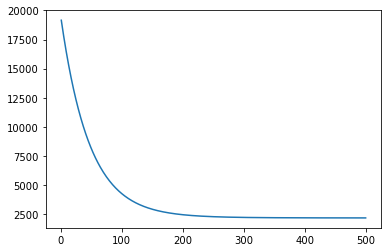

In [30]:
plt.plot(Iter["# Iteracion"],Iter["Error"])
plt.show()